In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('AirPassengers.csv')

In [3]:
df.Month = pd.to_datetime(df.Month)
df = df.set_index("Month")

In [4]:
train, test = df[:-12], df[-12:]

In [5]:
scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

In [6]:
n_input = 12
n_features = 1
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=6)

In [7]:
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
model.fit_generator(generator,epochs=90)

Instructions for updating:
Use tf.cast instead.
Epoch 1/90
20/20 [==============================] - 1s 55ms/step - loss: 0.0918
Epoch 2/90
20/20 [==============================] - 0s 22ms/step - loss: 0.0135
Epoch 3/90
20/20 [==============================] - 0s 17ms/step - loss: 0.0118
Epoch 4/90
20/20 [==============================] - 0s 18ms/step - loss: 0.0115
Epoch 5/90
20/20 [==============================] - 0s 22ms/step - loss: 0.0119
Epoch 6/90
20/20 [==============================] - 0s 17ms/step - loss: 0.0114
Epoch 7/90
20/20 [==============================] - 0s 23ms/step - loss: 0.0095
Epoch 8/90
20/20 [==============================] - 0s 20ms/step - loss: 0.0088
Epoch 9/90
20/20 [==============================] - 0s 20ms/step - loss: 0.0090
Epoch 10/90
20/20 [==============================] - 0s 17ms/step - loss: 0.0092
Epoch 11/90
20/20 [==============================] - 0s 18ms/step - loss: 0.0118
Epoch 12/90
20/20 [==============================] - 0s 17ms/step - lo

In [9]:
pred_list = []

batch = train[-n_input:].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

In [10]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=df[-n_input:].index, columns=['Prediction'])

df_test = pd.concat([df,df_predict], axis=1)

No handles with labels found to put in legend.


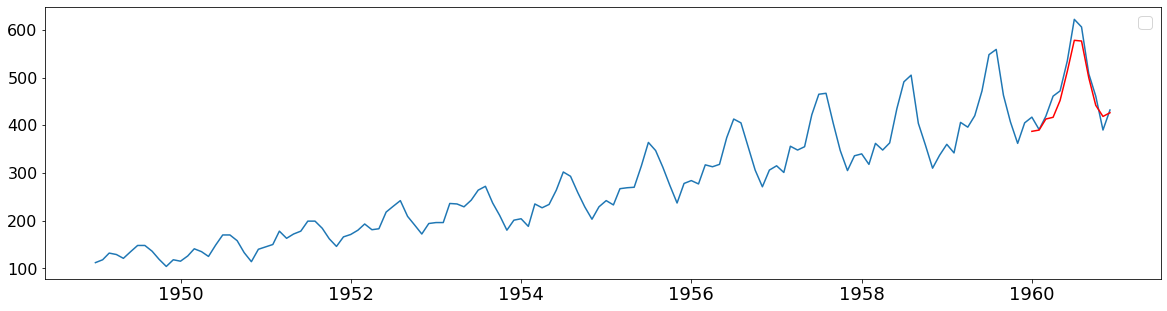

In [11]:
plt.figure(figsize=(20, 5))
plt.plot(df_test.index, df_test['AirPassengers'])
plt.plot(df_test.index, df_test['Prediction'], color='r')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

In [12]:
pred_actual_rmse = rmse(df_test.iloc[-n_input:, [0]], df_test.iloc[-n_input:, [1]])
print("rmse: ", pred_actual_rmse)

rmse:  [25.57641314]


In [13]:
train = df

In [14]:
scaler.fit(train)
train = scaler.transform(train)

In [15]:
n_input = 12
n_features = 1
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=6)

In [16]:
model.fit_generator(generator,epochs=90)

Epoch 1/90
22/22 [==============================] - 0s 17ms/step - loss: 0.0029
Epoch 2/90
22/22 [==============================] - 0s 17ms/step - loss: 0.0023
Epoch 3/90
22/22 [==============================] - 1s 24ms/step - loss: 0.0023
Epoch 4/90
22/22 [==============================] - 0s 17ms/step - loss: 0.0032
Epoch 5/90
22/22 [==============================] - 1s 25ms/step - loss: 0.0017
Epoch 6/90
22/22 [==============================] - 0s 16ms/step - loss: 0.0015
Epoch 7/90
22/22 [==============================] - 0s 16ms/step - loss: 0.0016
Epoch 8/90
22/22 [==============================] - 1s 25ms/step - loss: 0.0023
Epoch 9/90
22/22 [==============================] - 0s 16ms/step - loss: 0.0026
Epoch 10/90
22/22 [==============================] - 0s 22ms/step - loss: 0.0018
Epoch 11/90
22/22 [==============================] - 0s 16ms/step - loss: 0.0016
Epoch 12/90
22/22 [==============================] - 0s 22ms/step - loss: 0.0030
Epoch 13/90
22/22 [==================

In [17]:
pred_list = []

batch = train[-n_input:].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

In [18]:
from pandas.tseries.offsets import DateOffset
add_dates = [df.index[-1] + DateOffset(months=x) for x in range(0,13) ]
future_dates = pd.DataFrame(index=add_dates[1:],columns=df.columns)

In [19]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=future_dates[-n_input:].index, columns=['Prediction'])

df_proj = pd.concat([df,df_predict], axis=1)

No handles with labels found to put in legend.


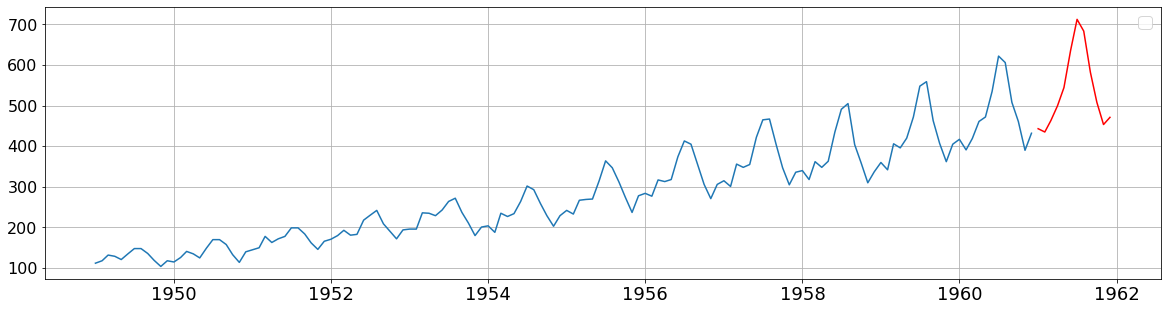

In [21]:
plt.figure(figsize=(20, 5))
plt.plot(df_proj.index, df_proj['AirPassengers'])
plt.plot(df_proj.index, df_proj['Prediction'], color='r')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.grid()
plt.show()